In [5]:
import tensorflow as tf
from keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Activation
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.utils import to_categorical
from keras.initializers import RandomUniform
from keras.initializers import Constant
import numpy as np
import matplotlib.pyplot as plt

Preprocessing

In [2]:
def get_dataset(num_features: int, num_classes) -> tuple[tuple[np.ndarray, np.ndarray], tuple[np.ndarray, np.ndarray]]:
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    print (f"x shape: {x_train.shape}   y shape: {y_train.shape}")
    x_train = x_train.reshape(-1, num_features).astype(np.float32)
    x_test = x_test.reshape(-1, num_features).astype(np.float32)
    y_train = to_categorical(y_train, num_classes=num_classes, dtype=np.float32)
    y_test = to_categorical(y_test, num_classes=num_classes, dtype=np.float32)
    return (x_train, y_train), (x_test, y_test)


In [9]:
def build_model(num_features, num_classes) -> Sequential:
    init_w = RandomUniform(minval=-0.05, maxval=0.05)
    init_b = Constant(value=0.0)
    model = Sequential()
    model.add(Dense(units=256, input_shape=(num_features,),
                    kernel_initializer=init_w, bias_initializer=init_b))
    model.add(Activation("relu"))
    model.add(Dense(units=128, input_shape=(num_features,),
                    kernel_initializer=init_w, bias_initializer=init_b))
    model.add(Activation("relu"))
    model.add(Dense(units=64, input_shape=(num_features,),
                    kernel_initializer=init_w, bias_initializer=init_b))
    model.add(Activation("relu"))
    model.add(Dense(units=num_classes))
    model.add(Activation("softmax"))
    return model

Train the Model

x shape: (60000, 28, 28)   y shape: (60000,)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 256)               200960    
                                                                 
 activation_20 (Activation)  (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 128)               32896     
                                                                 
 activation_21 (Activation)  (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 activation_22 (Activation)  (None, 64)                0         
                                                                 
 dense_23

c:\Users\yann.MSI\anaconda3\envs\data_science\Lib\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


469/469 [==============================] - 2s 3ms/step - loss: 0.2738 - accuracy: 0.9194 - val_loss: 0.1461 - val_accuracy: 0.9562
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1141 - accuracy: 0.9659 - val_loss: 0.1333 - val_accuracy: 0.9607
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0860 - accuracy: 0.9732 - val_loss: 0.1233 - val_accuracy: 0.9639
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0710 - accuracy: 0.9788 - val_loss: 0.1242 - val_accuracy: 0.9634
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0628 - accuracy: 0.9806 - val_loss: 0.1120 - val_accuracy: 0.9723
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0559 - accuracy: 0.9833 - val_loss: 0.1207 - val_accuracy: 0.9718
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0485 - accuracy: 0.9847 - val_loss: 0.0951 - val_accuracy: 0.9763
Epoch 8/10
469/46

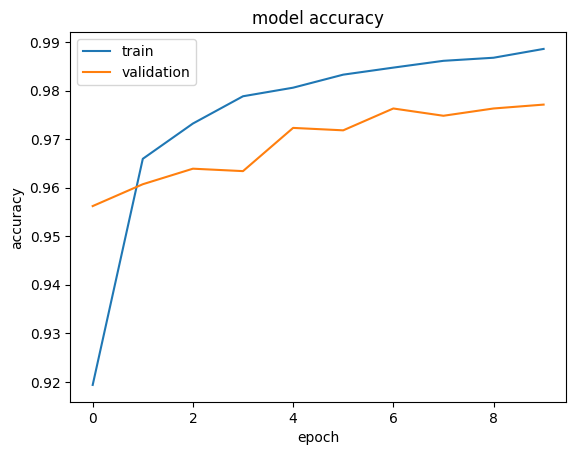

In [14]:
num_features = 784
num_classes = 10
(x_train, y_train), (x_test, y_test) = get_dataset(num_features, num_classes)

model = build_model(num_features=num_features, num_classes=num_classes)

model.summary()

model.compile(loss="categorical_crossentropy",
              optimizer=Adam(learning_rate=0.001),
              metrics=["accuracy"])

history = model.fit (x=x_train, 
           y=y_train, 
           epochs=10, 
           batch_size=128, 
           verbose=1, 
           validation_data=(x_test, y_test))

scores = model.evaluate(x=x_test, y=y_test)

print(f"Score: {scores}")

# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()